In [35]:
pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Задача 1: Загрузка и проверка данных

#### Загрузите таблицу из CSV-файла


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Churn.csv', sep=',', encoding='utf-8', index_col=0)

#### Посмотрите, сколько всего клиентов и столбцов в таблице

In [37]:
row_count, col_count = df.shape
print(f"В загруженной таблице всего {row_count} строк (клиентов) и {col_count} столбцов")
print("Столбец 'RowNumber' загружен как индекс записей. В общем наборе не участвует.")

В загруженной таблице всего 10000 строк (клиентов) и 13 столбцов
Столбец 'RowNumber' загружен как индекс записей. В общем наборе не участвует.


#### Проверьте, есть ли пустые ячейки или повторяющиеся клиенты

In [38]:
def get_count_rows_with_null():
    filtered = df[
        (df['CustomerId'].isnull()) |
        (df['Surname'].isnull()) |
        (df['CreditScore'].isnull()) |
        (df['Geography'].isnull()) |
        (df['Gender'].isnull()) |
        (df['Age'].isnull()) |
        (df['Tenure'].isnull()) |
        (df['Balance'].isnull()) |
        (df['NumOfProducts'].isnull()) |
        (df['HasCrCard'].isnull()) |
        (df['IsActiveMember'].isnull()) |
        (df['EstimatedSalary'].isnull()) |
        (df['Exited'].isnull())
    ]
    return len(filtered)

def get_count_customerid_non_uniq_rows(total_rows):
    result = df['CustomerId'].nunique()
    return total_rows - result

def get_count_non_uniq_rows(total_rows):
    df['Aggr_info'] = (
            df['Surname'] + ' ' +
            df['Geography'] + ' ' +
            df['Gender'] + ' ' +
            df['Age'].astype(str)
    )
    rows = (df['Aggr_info'].nunique())
    return total_rows - rows

rows_with_null = get_count_rows_with_null()
rows_non_uniq  = get_count_non_uniq_rows(row_count)
df = df.drop('Aggr_info', axis=1)
rows_customerid_non_uniq  = get_count_customerid_non_uniq_rows(row_count)

print(f"Количество строк с хотя бы одной пустой ячейкой - {rows_with_null}, \n"
      f"с повторяющимися клиентами - {rows_non_uniq}, \n"
      f"с повторяющимися значениями в поле CustomerId - {rows_customerid_non_uniq}")

Количество строк с хотя бы одной пустой ячейкой - 909, 
с повторяющимися клиентами - 241, 
с повторяющимися значениями в поле CustomerId - 0


#### Удалите ошибки, если они есть
Ошибок не обнаружил. С данными можно продолжать работать.
Встречается неописанный и неиспользуемый в задании столбец "Exited" не несущий информацию для данного анализа. Чтобы уменьшить выборку и сократить объём задействованной оперативной памяти программы предлагаю его исключить путём удаления. Остаётся 12 столбцов.
Строки с повторяющимися данными, считаю, удалять не следует, поскольку нет уверенности в том, что это действительно задвоенные клиенты. Не хватает данных для проверки данного утверждения. Например, номера паспорта и точного адреса проживания. Следует дополнительно уточнить критерии выборки уникальных клиентов и расширить набор данных.

In [39]:
df = df.drop('Exited', axis=1)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64
9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77
9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58


### Задача 2: Анализ данных инструментами Python
#### 2.1 Сколько клиентов в каждой стране?
**Подсчитайте количество клиентов в каждой стране**

In [40]:
countries = df['Geography'].unique()
for country in countries:
    print(f"{country} {df[df['Geography'] == country].shape[0]} кл.")

France 5014 кл.
Spain 2477 кл.
Germany 2509 кл.


**Найдите средний баланс клиентов в каждой стране**

In [41]:
print(f"Средний баланс для клиентов в каждой стране:\n"
      f"{df.groupby('Geography')['Balance'].mean()} кл.")

Средний баланс для клиентов в каждой стране:
Geography
France      62092.636516
Germany    119730.116134
Spain       61818.147763
Name: Balance, dtype: float64 кл.


#### 2.2 Какие клиенты самые активные?
**Разделите клиентов на возрастные группы: молодые (18-30), средний возраст (31-45), зрелые (46-60), пожилые (60+)
Посчитайте, сколько процентов активных клиентов в каждой группе**

In [42]:
def calc_prc_active_customers(lbound, rbound):
    count_group_active = df[(df['Age'] >= lbound) & (df['Age'] <= rbound) & (df['IsActiveMember'] == 1)].shape[0]
    count_group_all = df[(df['Age'] >= lbound) & (df['Age'] <= rbound)].shape[0]
    return round(count_group_active * 100 / count_group_all, 2)

print(f"{calc_prc_active_customers(18, 30)}% активных пользователей в группе 'молодые (18-30)'")
print(f"{calc_prc_active_customers(31, 45)}% активных пользователей в группе 'средний возраст (31-45)'")
print(f"{calc_prc_active_customers(46, 60)}% активных пользователей в группе 'зрелые (46-60)'")
print(f"{calc_prc_active_customers(61, 200)}% активных пользователей в группе 'пожилые (60+)'")

51.12% активных пользователей в группе 'молодые (18-30)'
49.15% активных пользователей в группе 'средний возраст (31-45)'
52.22% активных пользователей в группе 'зрелые (46-60)'
80.82% активных пользователей в группе 'пожилые (60+)'


#### 2.3 Сколькими продуктами пользуются клиенты?

**Узнайте, у скольких клиентов 1, 2, 3 или 4 продукта.
Найдите средний баланс для клиентов с разным количеством продуктов**

In [58]:
def calc_customers_by_prodnum(prodnum):
    return df[(df['Age'] >= prodnum)].shape[0]

customers_with_1_prod = df[(df['NumOfProducts'] == 1)].shape[0]
customers_with_2_prod = df[(df['NumOfProducts'] == 2)].shape[0]
customers_with_3_prod = df[(df['NumOfProducts'] == 3)].shape[0]
customers_with_4_prod = df[(df['NumOfProducts'] == 4)].shape[0]
print(f"{customers_with_1_prod} кл. имеют 1 продукт")
print(f"{customers_with_2_prod} кл. имеют 2 продукт")
print(f"{customers_with_3_prod} кл. имеют 3 продукт")
print(f"{customers_with_4_prod} кл. имеют 4 продукт\n")

print(f"Средний баланс для клиентов с разным количеством продуктов:\n"
      f"{df.groupby('NumOfProducts')['Balance'].mean()} кл.")

5084 кл. имеют 1 продукт
4590 кл. имеют 2 продукт
266 кл. имеют 3 продукт
60 кл. имеют 4 продукт

Средний баланс для клиентов с разным количеством продуктов:
NumOfProducts
1    98551.870614
2    51879.145813
3    75458.328195
4    93733.135000
Name: Balance, dtype: float64 кл.


#### Задача 3: Создание графиков
**3.1 Откуда клиенты?
Круговая диаграмма: покажите долю клиентов из каждой страны.
Столбчатая диаграмма: покажите распределение по возрасту.**

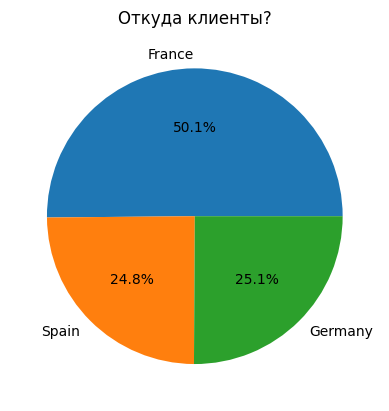

In [44]:
countries = df['Geography'].unique()
country_proc = []
for country in countries:
    count_customers = df[df['Geography'] == country].shape[0]
    country_proc.append(count_customers * 100 / row_count)

plt.pie(country_proc, labels=countries, autopct='%1.1f%%')
plt.title("Откуда клиенты?")
plt.show()

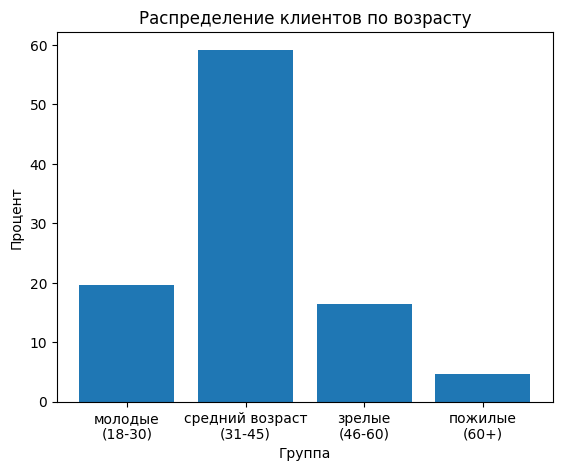

In [45]:
def calc_prc_customers(lbound, rbound):
    count_group_all = df[(df['Age'] >= lbound) & (df['Age'] <= rbound)].shape[0]
    return round(count_group_all * 100 / row_count, 2)

customer_age_groups = ['молодые\n(18-30)', 'средний возраст\n(31-45)',
              'зрелые\n(46-60)', 'пожилые\n(60+)']
values = [calc_prc_customers(18, 30), calc_prc_customers(31, 45),
          calc_prc_customers(46, 60), calc_prc_customers(61, 200)]

plt.bar(customer_age_groups, values)
plt.title("Распределение клиентов по возрасту")
plt.xlabel("Группа")
plt.ylabel("Процент")
plt.show()

#### 3.2 Кто богаче?
**Точечный график: покажите связь между возрастом и балансом**

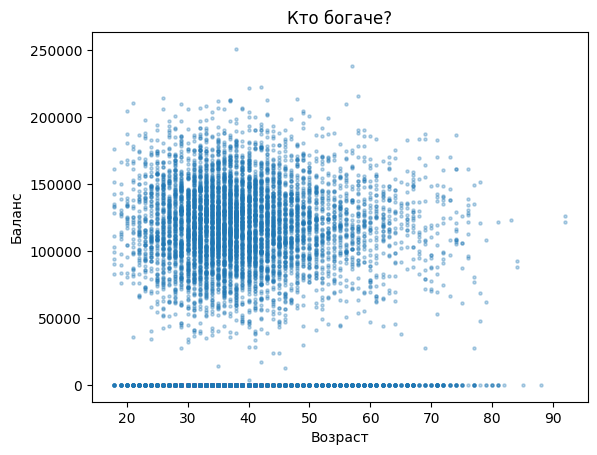

In [46]:
x = df['Age']
y = df['Balance']

plt.scatter(x, y, alpha=0.3, s=5)
plt.title("Кто богаче?")
plt.xlabel("Возраст")
plt.ylabel("Баланс")

plt.show()

#### 3.3 Кто активнее?
**Столбчатая диаграмма: процент активных клиентов в каждой стране.**
**Сравнительная диаграмма: средний баланс активных и неактивных клиентов**

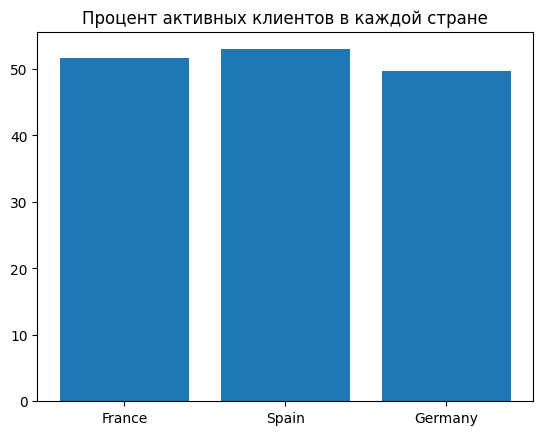

In [47]:
countries = df['Geography'].unique()
country_proc = []
for country in countries:
    count_customers = df[df['Geography'] == country].shape[0]
    count_active_customers = df[(df['Geography'] == country) &
                                (df['IsActiveMember'] == 1)].shape[0]
    country_proc.append(count_active_customers * 100 / count_customers)

plt.bar(countries, country_proc)
plt.title("Процент активных клиентов в каждой стране")
plt.show()

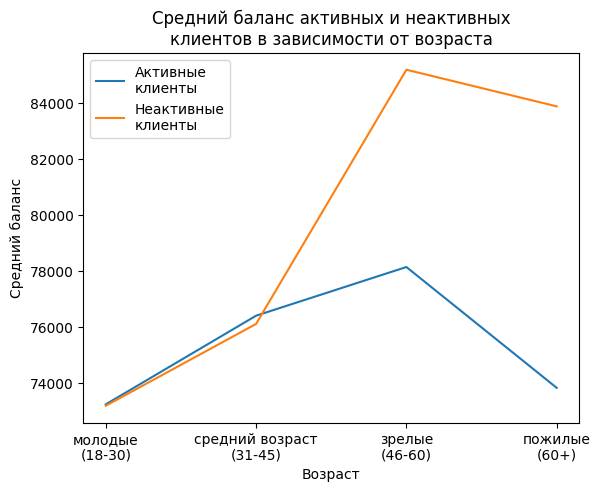

In [60]:
def calc_avg_balance_customers(lbound, rbound, isactive):
    return df[(df['Age'] >= lbound) & (df['Age'] <= rbound) &
              (df['IsActiveMember'] == isactive)]['Balance'].mean()

customer_age_groups = ['молодые\n(18-30)', 'средний возраст\n(31-45)',
                       'зрелые\n(46-60)', 'пожилые\n(60+)']
active_customer_avg_balance = [calc_avg_balance_customers(18, 30, 1),
                               calc_avg_balance_customers(31, 45, 1),
                               calc_avg_balance_customers(46, 60, 1),
                               calc_avg_balance_customers(61, 200, 1)]
nonactive_customer_avg_balance = [calc_avg_balance_customers(18, 30, 0),
                                  calc_avg_balance_customers(31, 45, 0),
                                  calc_avg_balance_customers(46, 60, 0),
                                  calc_avg_balance_customers(61, 200, 0)]

plt.plot(customer_age_groups, active_customer_avg_balance, label='Активные\nклиенты')
plt.plot(customer_age_groups, nonactive_customer_avg_balance, label='Неактивные\nклиенты')
plt.title("Cредний баланс активных и неактивных\n"
          "клиентов в зависимости от возраста")
plt.xlabel("Возраст")
plt.ylabel("Средний баланс")
plt.legend()
plt.show()

#### Задача 4: Напишите выводы о проведенном исследовании

В ходе аналитической работы была успешно обработана и проанализирована выборка, состоящая из 10 000 клиентских записей. После первичной проверки данных и удаления одного неинформативного столбца был проведен комплексный анализ, позволивший выявить следующие ключевые закономерности:

**1. Географическое и демографическое распределение:**

Клиентская база имеет ярко выраженную географическую асимметрию: половина всех клиентов (50.1%) сосредоточена во Франции. На Испанию и Германию приходится примерно по четверти клиентов (24.8% и 25.1% соответственно).

По возрасту доминирует группа «средний возраст (31-45)», которая составляет 58% от всей базы. Молодые (18-30) и зрелые (46-60) клиенты представлены примерно одинаково (19% и 17%), а пожилые (60+) являются наименьшей группой (6%).

**2. Финансовые показатели по странам:**

Несмотря на меньшее количество клиентов, Германия демонстрирует значительно более высокий средний баланс (119 730) — почти в два раза выше, чем у клиентов из Франции (62 093) и Испании (61 818). Это указывает на то, что немецкий сегмент является наиболее финансово емким и перспективным.

**3. Активность клиентов: ключевые инсайты**

Выявлена четкая положительная корреляция между возрастом и вовлеченностью. Наиболее активной группой являются пожилые клиенты (60+), среди которых активны 80.82%. С увеличением возраста наблюдается устойчивый рост активности: от 51.12% среди молодежи до 80.82% среди пожилых.

Уровень активных клиентов примерно одинаков во Франции (52%) и Испании (54%), в то время как в Германии он несколько ниже (48%), несмотря на более высокие балансы.

**4. Продуктовая корзина и балансы:**

Подавляющее большинство клиентов пользуются одним (5084 чел.) или двумя (4590 чел.) продуктами банка. Доля клиентов с тремя и особенно четырьмя продуктами незначительна (266 и 60 чел.).

Наибольший средний баланс у клиентов с одним продуктом (98 552). Клиенты с двумя продуктами имеют значительно меньший баланс (51 879 €), в то время как владельцы 3-4 продуктов демонстрируют его рост, что может указывать на комплексное обслуживание и накопление капитала.

**Заключение и рекомендации:**
Проведенный анализ выявил несколько стратегически важных направлений для бизнеса:

Германия — приоритет для премиального обслуживания: Немецкий рынок, несмотря на меньшую долю и активность, генерирует наибольший объем средств. Целесообразно разработать для этой группы программы по увеличению лояльности и активности.
Пожилые клиенты — золотой актив: Группа 60+ демонстрирует исключительную лояльность и активность. Это делает их приоритетной для удержания и предложения премиальных услуг, ориентированных на сохранение и приумножение капитала.
Стратегия кросс-продаж для "среднего возраста": Основная масса клиентов (58%) — это люди среднего возраста. Именно среди них (и отчасти среди молодежи) следует активно продвигать второй и третий продукты, чтобы повысить их жизненную ценность для банка.
Исследование "богатых" владельцев одного продукта: Сегмент клиентов с одним продуктом и высоким балансом требует отдельного изучения, чтобы понять их мотивацию и предложить им персонализированные решения, которые увеличат их вовлеченность.